# Titanic 

This is the basic model that I built for my first Kaggle Competition based on the data for the Titanic Machine Learning dataset.


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

# Training Data

In [3]:
# Read file
train = pd.read_csv('../input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Some missing data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Some continuous features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

In [7]:
# Percent of survivors (1) around 38%
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [8]:
# Not sure about these features
train = train.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

#train = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# Is your gender important to survival?
train.groupby("Sex")["Survived"].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

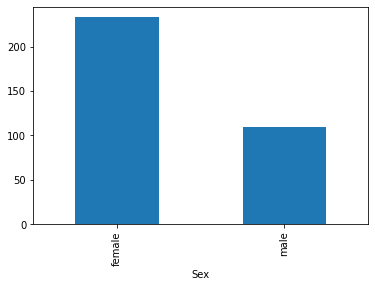

In [10]:
# Gender plot
train.groupby("Sex")["Survived"].sum().plot.bar()

In [11]:
# Passenger class totals
train.groupby("Pclass")["Survived"].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [12]:
# Of those who survived
train.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

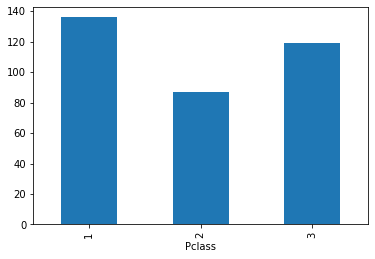

In [13]:
# How important is Pclass?
train.groupby("Pclass")["Survived"].sum().plot.bar()

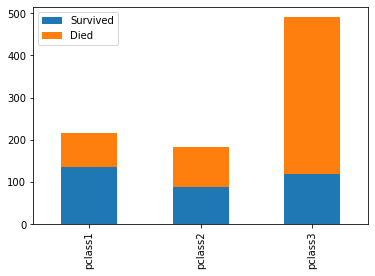

In [15]:
# Stacked bar of Pclass survivors
plotdata = pd.DataFrame({'Survived': [136, 87, 119], 'Died': [80, 97, 372]}, 
    index=['pclass1', 'pclass2', 'pclass3'])
plotdata.plot(kind="bar", stacked=True)

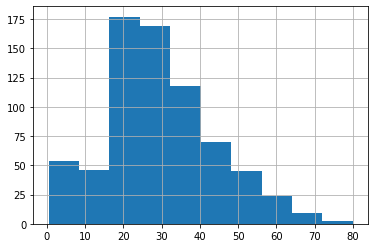

In [16]:
# Ages of those aboard
train.Age.hist()

In [17]:
# Is age important
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
# Fill missing values
train['Age'].fillna(value=train['Age'].mean(), inplace=True)

In [19]:
# Check it
train.Age.isnull().sum()

0

In [20]:
# Embared from totals
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# Survivors
train.groupby("Embarked")["Survived"].sum()

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

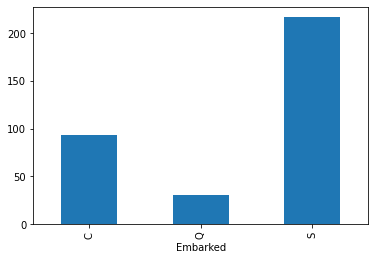

In [22]:
# Not sure how important this is
train.groupby("Embarked")["Survived"].sum().plot.bar()

In [23]:
# Fill missing values
train['Embarked'].fillna(value='S', inplace=True)

In [24]:
# Check it worked
train.Embarked.isna().sum()

0

# One Hot Encoding

In [26]:
# Convert categorical data
train = pd.get_dummies(train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# Test Train Split

In [27]:
# Set the target
y = train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
# Set the labels
X = train.drop('Survived', axis = 1)
X.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,1,0,1,0,1
1,38.0,1,0,71.2833,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1
3,35.0,1,0,53.1000,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1


In [29]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Scale the data

In [30]:
# First I tried Standard Scaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform (X_test)

In [31]:
# Similar results with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

# Models

## Regression Models

In [32]:
# Linear Regression
linreg = LinearRegression()

# Fit
linreg.fit(X_train, y_train)

# Predict
linreg_pred = linreg.predict(X_test)

# RMSE
np.sqrt(mean_squared_error(y_test, linreg_pred))

0.37155349203592664

### StandardScaler Score 0.3715

In [33]:
# Decision tree
dt = DecisionTreeRegressor(max_depth=10,random_state=123)

# Fit
dt.fit(X_train, y_train)

# Predict
dt_pred = dt.predict(X_test)

# RMSE
np.sqrt(mean_squared_error(y_test, dt_pred))

0.4075083893504796

### StandardScaler Score 0.4075

In [34]:
# SVR
svr = SVR(kernel='rbf', C=5)

# Fit
svr.fit(X_train, y_train)

# Predict
svr_pred = svr.predict(X_test)

# RMSE
np.sqrt(mean_squared_error(y_test, svr_pred))


0.3653308066326031

### StandardScaler Score 0.3723

In [35]:
# KNN Regressor
knn = KNeighborsRegressor()

# Fit
knn.fit(X_train, y_train)

# Predict
knn_reg_pred = knn.predict(X_test)

# RMSE
np.sqrt(mean_squared_error(y_test, knn_reg_pred))

0.37212274362482867

### StandardScaler Score 0.3648

## Classifier Models

In [36]:
# Import metrics
from sklearn.metrics import (accuracy_score, 
                            f1_score, 
                            confusion_matrix, 
                            classification_report,
                            confusion_matrix)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

#KNN Model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

knn_training_preds = knn_clf.predict(X_train)
knn_training_accuracy = accuracy_score(y_train, knn_training_preds)

knn_val_preds = knn_clf.predict(X_test)
knn_val_accuracy = accuracy_score(y_test, knn_val_preds)

print("KNN Training Accuracy: {:.4}%".format(knn_training_accuracy * 100))
print("KNN Validation accuracy: {:.4}%".format(knn_val_accuracy * 100))

KNN Training Accuracy: 84.73%
KNN Validation accuracy: 81.17%


* KNN Training Accuracy: 85.63%
* KNN Validation accuracy: 81.61%

In [38]:
from sklearn.ensemble import RandomForestClassifier


# Forest Model
forest_clf = RandomForestClassifier()
forest_model = forest_clf.fit(X_train, y_train)

forest_training_preds = forest_clf.predict(X_train)
forest_training_accuracy = accuracy_score(y_train, forest_training_preds)

forest_val_preds = forest_clf.predict(X_test)
forest_val_accuracy = accuracy_score(y_test, forest_val_preds)

print("Forest Training Accuracy: {:.4}%".format(forest_training_accuracy * 100))
print("Forest Validation accuracy: {:.4}%".format(forest_val_accuracy * 100))

Forest Training Accuracy: 98.65%
Forest Validation accuracy: 80.72%


* Forest Training Accuracy: 98.65%
* Forest Validation accuracy: 80.72%

In [39]:
from sklearn.linear_model import LogisticRegression

# Log model
log_clf = LogisticRegression(random_state=123)
log_model = log_clf.fit(X_train, y_train)

log_training_preds = log_clf.predict(X_train)
log_training_accuracy = accuracy_score(y_train, log_training_preds)

log_val_preds = log_clf.predict(X_test)
log_val_accuracy = accuracy_score(y_test, log_val_preds)

print("Log Training Accuracy: {:.4}%".format(log_training_accuracy * 100))
print("Log Validation Accuracy: {:.4}%".format(log_val_accuracy * 100))

Log Training Accuracy: 79.64%
Log Validation Accuracy: 81.61%


* Log Training Accuracy: 80.09%
* Log Validation Accuracy: 79.82%

In [40]:
import xgboost as xgb

# XGB classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

xgb_training_preds = xgb_clf.predict(X_train)
xgb_training_accuracy = accuracy_score(y_train, xgb_training_preds)

xgb_val_preds = xgb_clf.predict(X_test)
xgb_val_accuracy = accuracy_score(y_test, xgb_val_preds)

print("XGB Training Accuracy: {:.4}%".format(xgb_training_accuracy * 100))
print("XGB Validation accuracy: {:.4}%".format(xgb_val_accuracy * 100))

XGB Training Accuracy: 97.46%
XGB Validation accuracy: 82.06%


* XGB Training Accuracy: 97.46%
* XGB Validation accuracy: 82.06%

# Test data

In [41]:
# Imput test data
test_set = pd.read_csv('../input/titanic/test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
# Check out missing values
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [43]:
# How different is it from the train?
test_set.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [44]:
# Drop same as in train
test = test_set.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [45]:
# Fare has one this time
test_set.Fare.isnull().sum()

1

In [46]:
# What class was this passenger in?
test_set.loc[test_set['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
# How much did each class pay?
test_set.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.7500
3     7.8958
Name: Fare, dtype: float64

In [48]:
# Fill 'Fare' with mean
test['Fare'].fillna(8, inplace=True)

In [49]:
# Fill age with mean
test['Age'].fillna(value=test['Age'].mean(), inplace=True)

In [50]:
# One hot encoding
test = pd.get_dummies(test, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [51]:
# Check it worked
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1
2,62.0,0,0,9.6875,1,1,0,1,0
3,27.0,0,0,8.6625,1,0,1,0,1
4,22.0,1,1,12.2875,0,0,1,0,1


In [52]:
# Scaler
scaler = MinMaxScaler()
test = scaler.fit_transform(test)

# Predictions

## Random Forest Predictions

In [53]:
# Predict target values on test set
forest_test_preds = forest_clf.predict(test)

In [54]:
# Change array to a dataframe
forest_target = pd.DataFrame(forest_test_preds)

In [55]:
# Percentage of survivors
forest_target.value_counts(normalize=True)

0    0.648325
1    0.351675
dtype: float64

In [56]:
# Totals
forest_target.value_counts()

0    271
1    147
dtype: int64

## KNN Predictions

In [57]:
# Predict target values on test set
knn_test_preds = knn_clf.predict(test)

In [58]:
# Change array to a dataframe
knn_target = pd.DataFrame(knn_test_preds)

In [59]:
# As a percentage 
knn_target.value_counts(normalize=True)

0    0.655502
1    0.344498
dtype: float64

In [60]:
# Survived
knn_target.value_counts()

0    274
1    144
dtype: int64

## Logistic Predictions

In [61]:
# Predict target values on test set
log_test_preds = log_clf.predict(test)

In [62]:
# Change array to a dataframe
log_target = pd.DataFrame(log_test_preds)

In [63]:
# Percentages
log_target.value_counts(normalize=True)

0    0.631579
1    0.368421
dtype: float64

In [64]:
# Totals
log_target.value_counts()

0    264
1    154
dtype: int64

## XGB Predictions

In [65]:
# Predict target values on test set
xgb_test_preds = xgb_clf.predict(test)

In [66]:
# Change array to a dataframe
xgb_target = pd.DataFrame(xgb_test_preds)

In [67]:
# Totals
xgb_target.value_counts()

0    269
1    149
dtype: int64

In [68]:
# The simple dataframe... missing column name!
xgb_target.head()

,0
0,0
1,0
2,0
3,0
4,1


# Merging

## Random Forest Output

In [69]:
# Put PassengerId back in solution
forest_output = pd.merge(test_set['PassengerId'], forest_target, how = 'left', 
                         left_index = True, right_index = True)


In [70]:
# Check it out
forest_output.head()

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [71]:
# Put in the column name
forest_output = forest_output.rename(columns = {0:"Survived"}) 

In [72]:
# Final solution
forest_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## KNN Classifier Output

In [73]:
knn_output = pd.merge(test_set['PassengerId'], knn_target, how = 'left', 
                      left_index = True, right_index = True)


In [74]:
knn_output = knn_output.rename(columns = {0:"Survived"}) 

In [75]:
knn_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## Logistic Output

In [76]:
log_output = pd.merge(test_set['PassengerId'], log_target, how = 'left', 
                      left_index = True, right_index = True)


In [77]:
log_output = log_output.rename(columns = {0:"Survived"}) 

In [78]:
log_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


## XGBoost Output

In [79]:
xgb_output = pd.merge(test_set['PassengerId'], xgb_target, how = 'left', 
                      left_index = True, right_index = True)

In [80]:
xgb_output = xgb_output.rename(columns = {0:"Survived"}) 

In [81]:
xgb_output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Outputs to CSV

In [82]:
# Change solutions to csv files.
log_output.to_csv('whipple_titanic_log_submission2.csv', index=False)

In [83]:
forest_output.to_csv('whipple_titanic_forest_submission2.csv', index=False)

In [84]:
knn_output.to_csv('whipple_titanic_knn_submission2.csv', index=False)

In [85]:
xgb_output.to_csv('whipple_titanic_xgb_submission2.csv', index=False)

# My CSV Submissions

In [3]:
# Check how solutions in csv look
#knn_attempt = pd.read_csv('./whipple_titanic_knn_submission2.csv')
#knn_attempt.head()

In [ ]:
forest_attempt = pd.read_csv('./whipple_titanic_forest_submission.csv')
forest_attempt.head()

In [ ]:
logistic_attempt = pd.read_csv('./whipple_titanic_log_submission.csv')
logistic_attempt.head()

In [ ]:
xgb_attempt = pd.read_csv('./whipple_titanic_xgb_submission2.csv')
xgb_attempt.head()

# Conclusion

My random forest model had the best accuracy and a pretty good validation score. It seems to me that Pclass, Fare, and Age were good predictors of survivors. 

# Competition Scores

This is my score from the competition.

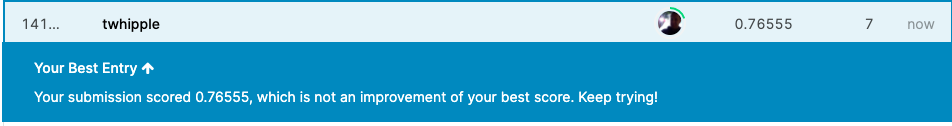

# Future Work

I could use Grid Search to modify the parameters and try improve the performance of my models. I also could use Cross Validation Score to assess the effectiveness of my model, particularly in order to avoid over-fitting.